<a href="https://colab.research.google.com/github/ucfilho/Dam_Project_Methods/blob/master/Metodo_10_xgboost_Barragem_BR_nov_19_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# carrega bibliotecas principais
import numpy as np
import pandas as pd
from pandas import read_excel
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
!git clone https://github.com/ucfilho/Dam_Project_Methods #clonar do Github
%cd Dam_Project_Methods
import Go2Confusion


fatal: destination path 'Dam_Project_Methods' already exists and is not an empty directory.
/content/Dam_Project_Methods


In [0]:
# clicar no botao e selecionar o arquivo
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Planilha de campo_Barragem BR.xlsx to Planilha de campo_Barragem BR (3).xlsx


In [0]:
my_sheet = 'Planilha de Campo Parcelas'
file_name = 'Planilha de campo_Barragem BR.xlsx' # name of your excel file
df = read_excel(file_name, sheet_name = my_sheet,header=1)

In [0]:
Nomes=['Est','Parc','CAP(cm)','DAP(cm)','H(m)','Nome comum'] 
XY=df[Nomes]
XY=XY.dropna()

In [0]:
numbers = np.unique(XY['Nome comum'], return_inverse=True)
#print(numbers)

In [0]:
XY['Tree']=pd.Series(numbers[1])
#print(XY)

In [0]:
#Nomes_X=['Tree','Parc','CAP(cm)','DAP(cm)','H(m)']
Nomes_X=['Tree','CAP(cm)','DAP(cm)','H(m)']
Nomes_Y=['Est']
X=XY[Nomes_X]
Y=XY[Nomes_Y]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


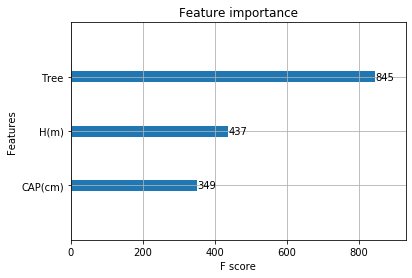

In [0]:
# fit model no training data
model = XGBClassifier()
model.fit(X, Y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [0]:
# para objeto de pesquisa deve-se tomar as medidas CAP no lugar de DAP por esta
# ser mais sensivel (PRINCIPIOS BASICOS DE DENDOMETRIA, pag. 18)
# http://esalqlastrop.com.br/img/aulas/24_principios_dendrometria.pdf

In [0]:
# circunferência à altura do peito (CAP) 
# DAP (diâmetro a altura do peito)

In [0]:
print(X.head())

   Tree  CAP(cm)    DAP(cm)  H(m)
0    47       22   7.002817   7.0
1    71       85  27.056340  13.0
2    71       34  10.822536   9.0
3    71       42  13.369015  10.0
4   121       80  25.464791  13.0


In [0]:
Xt, Xv, yt, yv = train_test_split(X, Y, test_size = 0.25, random_state = 0)
Xt=np.array(Xt);yt=np.array(yt);Xv=np.array(Xv);yv=np.array(yv);


In [0]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

xgb_model.fit(Xt, yt)

y_pred = xgb_model.predict(Xv)

cm, precision, recall=Go2Confusion.Confusao(yv,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(cm)
print("precisao",precision)
print("recall",recall)

[[210  13   9]
 [ 35  26   2]
 [  3   1  65]]
precisao [0.84677419 0.65       0.85526316]
recall [0.90517241 0.41269841 0.94202899]


In [0]:
print(XY.describe())

               Est         Parc  ...         H(m)         Tree
count  1454.000000  1454.000000  ...  1454.000000  1454.000000
mean      1.637552    16.732462  ...     7.371458    71.405777
std       0.827932     9.061499  ...     3.125704    38.275099
min       1.000000     1.000000  ...     0.000000     0.000000
25%       1.000000     9.000000  ...     5.000000    43.000000
50%       1.000000    18.000000  ...     7.000000    67.000000
75%       2.000000    25.000000  ...    10.000000   111.000000
max       3.000000    32.000000  ...    17.000000   138.000000

[8 rows x 6 columns]


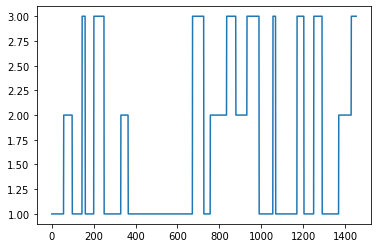

In [0]:
plt.plot(Y)